# Study 2

In [26]:
# Make imports
import import_ipynb
from run import Run
from constants import Constants
from field import Field
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from tempfile import NamedTemporaryFile
import base64 
from matplotlib import animation
from IPython.display import HTML

### 1. Setup
This consists of the following:
1. Defining parameters
2. Creating a batch of particle
3. Updating the batch of particle

In [2]:
#Create a constants object instance to access the constants from constants.ipynb file
constants = Constants()

In [107]:
# Create a run object instance
s2 = Run()

In [108]:
#### Same as study 1 for now

# Create 100 Hydrogen ions whose:
# speeds are Maxwellian sampled, velocity directions are uniform randomly sampled
# positions are all sampled such that particles start at [-0.5, 0, 0] 
# a chamber 1m x 1m x 1m with extreme points [-0.5, -0.5, -0.5] and [0.5, 0.5, 0.5] considered
s2.create_batch_with_file_initialization('H+', constants.constants['e'][0],\
                                          constants.constants['m_H'][0] * constants.constants['amu'][0], \
                                          100, 100, 'H ions', r_index=0, v_index=1)

In [109]:
'''
# Let's consider Electric field being flipped in direction, and taken up a few scales
E_scale = [0, 0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5]
# Let's consider a case with constant Magnetic field
B_scale = [1 for i in range(len(E_scale))]

# NOT THIS NOW EB_scale = [(i, j) for i in range(10) for j in range(10)] # list of tuples (0,0) ... (9,9)
'''

s2_index_update = 0 # Update the first batch in this Run instance 
s2_particle_track_indices = [i for i in range(100)] # Track all 100 particles
s2_dT = 10**(-7) # 0.1 microseconds 
s2_stepT = 10**(-9) # 0.001 microseconds time step
s2_Nsteps = int(s2_dT/s2_stepT)+1
# s2_E0 = 1000 # say 1000 Volts (voltage) per meter (size of chamber) 
# s2_Edirn = [1,0,0] #in the x-direction [1,0,0]
s2_B0 = 10 * (10**(-3)) # Meant to say 10 mT 
# keep magnetic field constant for now
# s2_Bdirn = [0,1,0] #in the y-direction [0,1,0]

# s2_argsE = [element * s1_E0 for element in s1_Edirn] # currently the uniform_E_field configuration is used
# s2_argsB = [element * s1_B0 for element in s1_Bdirn] # currently the uniform_B_field configuration is used

s2_batch_ps_and_vs = dict()
for i in range(100): # 100 is number of particles
    s2_batch_ps_and_vs[i] = []

s2_batch1 = s2.batches[0]['H ions'] # take current batch
s2_field = Field()

for i in range(s2_Nsteps):
    for j in range(len(s2_batch1.particles)):
        argsE = s2_field.radial_E_field(s2_batch1.particles[j].r, V=100, center = [0,0,0])
        argsB = s2_field.helmholtz_coil_B_field(n=1000, I=100, R=0.1, B_hat=[0,0,1], mu_0=constants.constants['mu_0'][0])
        args = (s2_field, s2_stepT, argsE, argsB)
        s2_batch1.particles[j].update(args)
        ithUpdateForAParticle = (i, s2_batch1.particles[j].r, s2_batch1.particles[j].v)
        s2_batch_ps_and_vs[j].append(ithUpdateForAParticle)

'''
s2_batch_ps_and_vs will be of the form : 
{ 0 (means 0th particle): [(0 (means 0th timestep), array of position, array of velocity)]
     }

so it is a dictionary whose keys are strings describing the E and B field scales and
values are particles update history which is:
    a dictionary whose keys are intergers representing particles and values are update history for that particle
    which is:
        list of tuples (time step, position, velocity)
'''

'\ns2_batch_ps_and_vs will be of the form : \n{ 0 (means 0th particle): [(0 (means 0th timestep), array of position, array of velocity)]\n     }\n\nso it is a dictionary whose keys are strings describing the E and B field scales and\nvalues are particles update history which is:\n    a dictionary whose keys are intergers representing particles and values are update history for that particle\n    which is:\n        list of tuples (time step, position, velocity)\n'

In [110]:
print(s2_batch_ps_and_vs[0][99])

(99, array([-5.00121387e-01, -9.30583369e-05, -2.86364167e-04]), array([-7740.38314104,  3942.8214775 , -2863.641674  ]))


In [111]:
s2_allfield_p0_ps = []
s2_allfield_p0_vs = []
s2_p0 = s2_batch_ps_and_vs[0]
for i in range(len(s2_p0)):
        s2_allfield_p0_ps.append(s2_p0[i][1])
        s2_allfield_p0_vs.append(s2_p0[i][2])
s2_allfield_p0_ps = np.array(s2_allfield_p0_ps)
s2_allfield_p0_vs = np.array(s2_allfield_p0_vs)

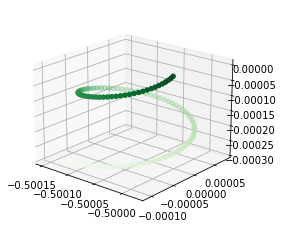

In [112]:
s2_allfield_p0_ps_fig = plt.figure()
s2_allfield_p0_ps_ax = plt.axes(projection='3d')
s2_allfield_p0_ps_ax.view_init(20, -50)

# Data for three-dimensional scattered points
# for position update history of particle 0 during all field configurations
s2_allfield_p0_ps_zdata = [elem[2] for elem in s2_allfield_p0_ps] # Animate this plot as well.
s2_allfield_p0_ps_xdata = [elem[0] for elem in s2_allfield_p0_ps]
s2_allfield_p0_ps_ydata = [elem[1] for elem in s2_allfield_p0_ps]
s2_allfield_p0_ps_ax.scatter3D(s2_allfield_p0_ps_xdata, s2_allfield_p0_ps_ydata, s2_allfield_p0_ps_zdata,\
                            c=s2_allfield_p0_ps_zdata, cmap='Greens');
#plt.savefig('ps2', dpi='figure', format='png')

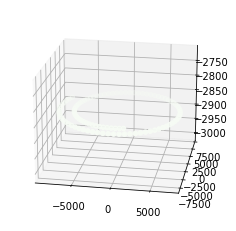

In [113]:
# Plot the velocity
s2_allfield_p0_vs_fig = plt.figure()
s2_allfield_p0_vs_ax = plt.axes(projection='3d')
s2_allfield_p0_vs_ax.view_init(20, -80)

# Data for three-dimensional scattered points
# for position update history of particle 0 during all field configurations
s2_allfield_p0_vs_zdata = [elem[2] for elem in s2_allfield_p0_vs] # Animate this plot as well.
s2_allfield_p0_vs_xdata = [elem[0] for elem in s2_allfield_p0_vs]
s2_allfield_p0_vs_ydata = [elem[1] for elem in s2_allfield_p0_vs]
s2_allfield_p0_vs_ax.scatter3D(s2_allfield_p0_vs_xdata, s2_allfield_p0_vs_ydata, s2_allfield_p0_vs_zdata,\
                            c=s2_allfield_p0_vs_zdata, cmap='Greens');
#plt.savefig('vs2', dpi='figure', format='png')

In [114]:
s2_particles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] # take particles at these indices
s2_allfield_10p_ps = []
s2_allfield_10p_vs = []

for aparticle in s2_particles:
    # Same procedure for as a single particle
    s2_allfield_ap_ps = []
    s2_allfield_ap_vs = []
    s2_ap = s2_batch_ps_and_vs[aparticle]
    for i in range(len(s2_p0)):
            s2_allfield_ap_ps.append(s2_ap[i][1])
            s2_allfield_ap_vs.append(s2_ap[i][2])
    s2_allfield_ap_ps = np.array(s2_allfield_ap_ps)
    s2_allfield_ap_vs = np.array(s2_allfield_ap_vs)
    
    s2_allfield_10p_ps.append(s2_allfield_ap_ps)
    s2_allfield_10p_vs.append(s2_allfield_ap_vs)

s2_allfield_10p_ps = np.array(s2_allfield_10p_ps)
s2_allfield_10p_vs = np.array(s2_allfield_10p_vs)

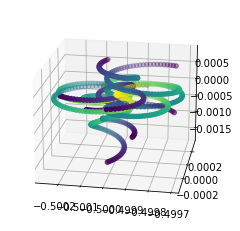

In [115]:
# Plot the positions
s2_allfield_10p_ps_fig = plt.figure()
s2_allfield_10p_ps_ax = plt.axes(projection='3d')
s2_allfield_10p_ps_ax.view_init(20, -80)

# Data for three-dimensional scattered points
for i in range(len(s2_particles)):
    
    s2_allfield_ap_ps_zdata = [elem[2] for elem in s2_allfield_10p_ps[i]] # Animate this plot as well.
    s2_allfield_ap_ps_xdata = [elem[0] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_ap_ps_ydata = [elem[1] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_10p_ps_ax.scatter3D(s2_allfield_ap_ps_xdata, s2_allfield_ap_ps_ydata, s2_allfield_ap_ps_zdata,\
                            c=s2_allfield_p0_ps_zdata);
plt.savefig('multips2', dpi='figure', format='png')

In [87]:
# Animate the positions
s2_allfield_10p_ps_anim = multiplot_animation_3d(s2_allfield_10p_ps)

'''
The particles are not getting closer. But going far away rather.
The scale is growing larger so the whole picture is zooming out.
That is why it looks like particles are moving closer even though they are not.
'''

# call our new function to display the animation
display_animation(s2_allfield_10p_ps_anim)
#s2_allfield_10p_ps_anim.save(r'multips2.mp4')   #Uncomment this line to save the animation to an mp4 file

In [41]:
s2_allfield_p0_ps_anim = plot_animation_3d(s2_allfield_p0_ps)

# call our new function to display the animation
display_animation(s2_allfield_p0_ps_anim)
#s2_allfield_p0_ps_anim.save(r'ps2.mp4')   #Uncomment this line to save the animation to an mp4 file

NameError: name 'plot_animation_3d' is not defined

In [39]:
VIDEO_TAG = """<video controls>
     <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
     Your browser does not support the video tag.
    </video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        f = NamedTemporaryFile(suffix='.mp4', delete=False)
        anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        f.flush()
        video = open(f.name, "rb").read()
        f.close()
        anim._encoded_video = base64.b64encode(video).decode('utf-8')

    return VIDEO_TAG.format(anim._encoded_video)



def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

def multiplot_animation_3d(positions):
    '''
    Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    '''

    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def init():
        ax.view_init(elev=20., azim=0)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.view_init(elev=20., azim=i)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter3D(position[:current_index, 0], position[:current_index, 1], position[:current_index, 2])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

# Currently plots x and y positions
def multiplot_animation_2d(positions, exclude):
    '''
    Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    exclude can be 0, 1 or 2:
    if exclude = 2, this means exclude the z data of the given array and plot the x and y data
    '''
    
    available = [0,1,2]
    available.remove(exclude)
    
    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter(position[:current_index, available[0]], position[:current_index, available[1]])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

def multiplot_animation_1d(positions, include):
    '''Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    include can be 0, 1 or 2.
    if include = 2, this means plot the z data of the array
    '''
    
    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter(np.arange(len(position))[:current_index], position[:current_index, include])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim